In [1]:
import pandas as pd
df = pd.read_csv('/Users/lixiang/Downloads/XTIUSD/XTIUSD1.csv')
df = df.shift(1)
df.iloc[0] = df.columns
df.columns = ['date','time', 'open', 'high', 'low', 'close', 'volume']
df.loc[0,'high'] = '32.055'
df['date'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df = df.drop(columns='time')
for c in df.columns[1:]:
    df[c] = pd.to_numeric(df[c],errors='coerce')
df.head()

,date,open,high,low,close,volume
0,2020-05-20 04:23:00,32.055,32.055,32.043,32.054,13.0
1,2020-05-20 04:24:00,32.062,32.063,32.038,32.038,13.0
2,2020-05-20 04:25:00,32.035,32.057,32.034,32.053,20.0
3,2020-05-20 04:26:00,32.052,32.063,32.052,32.058,15.0
4,2020-05-20 04:27:00,32.061,32.062,32.053,32.054,24.0


In [2]:
from tensortrade.data import Node, Module, DataFeed, Stream, Select

features = []
for c in df.columns[1:]:
    s = Stream(list(df[c])).rename(df[c].name)
    features += [s]

feed = DataFeed(features)
feed.compile()
feed.next()

{'open': 32.055,
 'high': 32.055,
 'low': 32.043,
 'close': 32.054,
 'volume': 13.0}

In [3]:
from tensortrade.exchanges import Exchange
from tensortrade.exchanges.services.execution.simulated import execute_order
from tensortrade.data import Stream, DataFeed, Module
from tensortrade.instruments import USD, BTC, ETH, XTI
from tensortrade.wallets import Wallet, Portfolio
from tensortrade.environments import TradingEnvironment


oil = Exchange("oil", service=execute_order)(
    Stream("XTIUSD", list(df['close'])),
)

portfolio = Portfolio(USD, [
    Wallet(oil, 3000 * USD)
])

env = TradingEnvironment(
    feed=feed,
    portfolio=portfolio,
    use_internal=False,
    action_scheme="managed-risk",
    reward_scheme="risk-adjusted",
    window_size=20
)

env.feed.next()

{'open': 32.055,
 'high': 32.055,
 'low': 32.043,
 'close': 32.054,
 'volume': 13.0,
 'oil:/USD:/free': 3000.0,
 'oil:/USD:/locked': 0.0,
 'oil:/USD:/total': 3000.0,
 'net_worth': 3000.0}

In [ ]:
from tensortrade.agents import DQNAgent
from tensortrade.agents import ParallelDQNAgent
def create_env():
    
    env = TradingEnvironment(
        feed=feed,
        portfolio=portfolio,
        action_scheme='managed-risk',
        reward_scheme='risk-adjusted',
        window_size=20
    )
    
    return env

agent = ParallelDQNAgent(create_env)

agent.train(n_envs=4, n_steps=200, save_path="examples/agents/")

In [8]:
from tensortrade.agents import A2CAgent
'''
def create_env():
    
    env = TradingEnvironment(
        feed=feed,
        portfolio=portfolio,
        action_scheme='managed-risk',
        reward_scheme='risk-adjusted',
        window_size=20
    )
    
    return env
'''
agent = A2CAgent(env)

agent.train(n_episodes = 1000, n_steps=200, save_path="examples/agents/")

====      AGENT ID: a256cd7e-11a2-4fbb-9674-a9ee57990572      ====
====      EPISODE ID (1/1000): a4919ff8-2073-494f-b59d-a8e903cb1590      ====


ValueError: Shape mismatch: The shape of labels (received (128,)) should equal the shape of logits except for the last dimension (received (1, 128)).

In [9]:
x,y=30,True
print(45<=x<=90, y or False)

False True


In [10]:
list1=["wuhan",'beijng','shangahi']
s="-".join(list1)
print(s)

wuhan-beijng-shangahi


In [13]:
import random
x=int(random.random())+3
print(x)

3


In [14]:
x1=4.5+9j
x2=8-3j
x3=x1.real+x2
print(x3)

(12.5-3j)


In [15]:
list=[11,12,13,14,15,16]
print(list[4:])

[15, 16]


In [16]:
print(chr(ord('T')-3))

Q


In [19]:
import math
print(math.ceil(-5.9))

-5


In [24]:
import random
fruit=['apple','pear']
m=fruit[:random.randint()]
print(m)


TypeError: randint() missing 2 required positional arguments: 'a' and 'b'

In [25]:
print([4,2,1]*3)

[4, 2, 1, 4, 2, 1, 4, 2, 1]


In [26]:
print('hust' not in  'I LOVE HUST')

True


In [31]:
print(pow(5,3))

125


In [34]:
print(len('WuhanWin'.lower()))

8


In [ ]:
k=123412351
print("")

In [19]:
x = int(input("input number"))
y = 0
for i in range(1,20):
    for j in range(1,20):
        z = i**3 + j**3
        if (x == z):
            y +=1
            if(y==1):
                print(x,":[",i,",",j,"]")
print(y)

1729 :[ 1 , 12 ]
4


In [11]:
s = input("Plesae input a word:")
s = s.lower() #low case all letters
intialLetter = s[0] #keep intial
restLetter = s[1:]

def deleteLetter(x):
    x=list(x)
    removeDic = ['a','e','i','o','u','h','y','w']
    for i in x:
        for z in removeDic:
            try:
                x.remove(z)
            except ValueError:
                pass
    return(''.join(x))    

def transformLetter(x):
    #x#=list(x)
    #print(x)
    dic1 = ['b','f','p','v']
    dic2 = ['c','g','j','k','q','s','x','z']
    dic3 = ['d','t','l','m','n','r']
    for z in dic1:
        x = x.replace(z,"3")
    for z in dic2:
        x = x.replace(z,"4")
    for z in dic3:
        x = x.replace(z,"5")
    x=''.join([j for i,j in enumerate(x) if j not in x[:i]])
    return(x)
afterDelete = deleteLetter(restLetter)    
afterTransform = transformLetter(afterDelete)
full=intialLetter + afterTransform

def finalCheck(x):
    x=list(x)
    if len(x)>4:
        x=x[0:3]
    elif len(x)<4:
        while len(x)<4:
            x.append('0')
    return(''.join(x))
final = finalCheck(full)

#y = deleteLetter(restLetter)

print(final)

w534


In [13]:
print("hello">="Hello")
ChinaAmericaIndiaJapan
0123456789

True


In [24]:
s = "ChinaAmericaIndiaJapan"
s = "0123456789abcdefghijklmnopqrst"
print(s[:6:-1])

tsrqponmlkjihgfedcba987


In [27]:
ls=['sun','moon']
def fun1(s1):
    ls.append(s1)
    return
fun1("wind")
print(ls)

['sun', 'moon', 'wind']


In [35]:
list1=[]
for i in range(20,5,-3):
    flag=True
    #print(i)
    for j in range(2,i):
        if i % j == 0:
            flag = False
            break
    if flag == False:
        list1.append(i)
print(list1)

[20, 14, 8]


In [36]:
x,y=30,True
print(45<=x<=90, y or False)

False True


In [37]:
x,y=90,25
print(x//y,x%y)

3 15


In [2]:
from scipy.stats import uniform
import matplotlib.pyplot as plt
import numpy as np


def uniform() -> None:
    fig, ax = plt.subplots(1, 1, figsize=(15,15))
    # calculate a few first moments
    mean, var, skew, kurt = uniform.stats(moments='mvsk')
    # display the probability density function (`pdf`)
    x = np.linspace(uniform.ppf(0.01), uniform.ppf(0.99), 100)
    ax.plot(x, uniform.pdf(x),
        'r-', lw=5, alpha=0.6, label='uniform pdf')
    ax.plot(x, uniform.cdf(x),
        'b-', lw=5, alpha=0.6, label='uniform cdf')
    # Check accuracy of `cdf` and `ppf`
    vals = uniform.ppf([0.001, 0.5, 0.999])
    np.allclose([0.001, 0.5, 0.999], uniform.cdf(vals))

    # generate random numbers
    r = uniform.rvs(size=1000)
    # and compare the histogram
    ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
    ax.legend(loc='best', frameon=False)
    plt.show()

uniform()

AttributeError: 'function' object has no attribute 'stats'

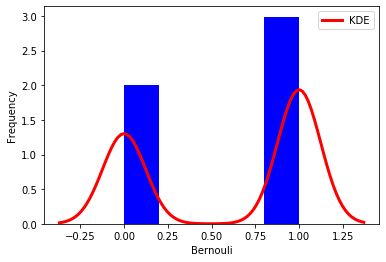

In [4]:
from scipy.stats import bernoulli
import seaborn as sb


def bernoulli_dist() -> None:
    data_bern = bernoulli.rvs(size=1000,p=0.6)
    ax = sb.distplot(
        data_bern, 
        kde=True, 
        color='b', 
        hist_kws={'alpha':1},
        kde_kws={'color': 'r', 'lw': 3, 'label': 'KDE'})
    ax.set(xlabel='Bernouli', ylabel='Frequency')

bernoulli_dist()

In [5]:
import tensorflow as tf
A = tf.constant([[1.,2.],[3.,4.]])
print(A.shape)
print(A.dtype)
print(A.numpy())

(2, 2)
<dtype: 'float32'>
[[1. 2.]
 [3. 4.]]


In [7]:
x = tf.Variable(initial_value = 3.)
with tf.GradientTape() as tape:
    y = tf.square(x)
y_grad = tape.gradient(y,x)
print(y,y_grad)

tf.Tensor(9.0, shape=(), dtype=float32) tf.Tensor(6.0, shape=(), dtype=float32)
